In [1]:
def remove_ambiguous(ori_list, threshold):
    #remove ambiguous pairs
    amb_list = []
    new_list = []
    ori_len = len(ori_list)
    cnt = 0
    for i in range(ori_len):
        for j in range(i+1, ori_len):
            if(ori_list[i][2] == ori_list[j][2]):
                if (float(ori_list[i][5])-threshold)*(float(ori_list[j][5])-threshold) < 0:
                    #print "DELETE compound %d %s %s and compound %d  %s %s" % (i, ori_list[i][4], ori_list[i][5], j, ori_list[j][4], ori_list[j][5])
                    #print ori_list[i][2]+"\n"+ori_list[j][2]+"\n"
                    if ori_list[i] not in amb_list:
                        amb_list.append(ori_list[i])
                    if ori_list[j] not in amb_list:
                        amb_list.append(ori_list[j])
                    cnt += 1
    print "# of ambiguous pairs: %d, %d compounds" % (cnt, len(amb_list))

    #remove ambiguous class
    cnt = 0
    for i in range(ori_len):
        if ((ori_list[i][4] == "<" or ori_list[i][4] == "<=") and (float(ori_list[i][5]) > threshold)) or \
        ((ori_list[i][4] == ">" or ori_list[i][4] == ">=") and (float(ori_list[i][5]) < threshold)):
            #print "compound", i, ori_list[i][4], ori_list[i][5], "Cannot Categorize"
            if ori_list[i] not in amb_list:
                amb_list.append(ori_list[i])
            cnt += 1
    print "# of ambiguous class: %d compounds" % cnt
    
    
    for i in ori_list:
        if i not in amb_list:
            new_list.append(i)
            
    print "new list length %d original list length %d" % (len(new_list), len(ori_list))
    
    return new_list
    
    
            

In [2]:
def remove_duplicate(ori_list):
    del_list = []
    new_list = []
    ori_len = len(ori_list)
    cnt = 0
    for i in range(ori_len):
        for j in range(i+1, ori_len):
            if(ori_list[i][2] == ori_list[j][2]):
                if ori_list[i] not in del_list:
                    del_list.append(ori_list[i])
                    cnt+=1
                    break
    
    print "# of duplicate compounds removed: %d" % cnt
    
                
                
    for i in ori_list:
        if i not in del_list:
            new_list.append(i)
            
    for i in range(len(new_list)):
        for j in range(i+1, len(new_list)):
            if(new_list[i][2] == new_list[j][2]):
                print "error"
                
    print "new list length %d original list length %d" % (len(new_list), len(ori_list))
                
    return new_list

In [3]:
def stable(relation, half_life, threshold):
    if ((relation == "=" or relation == ">" or relation == ">=") and half_life > threshold) or ((relation == ">" or relation == ">=") and half_life == threshold):
        return 1
    else:
        return 0
    
def save_training_set(ori_list, threshold):
    num_stable = 0
    num_unstable = 0
    for i in ori_list:
        if(stable(i[4], float(i[5]), threshold)):
            num_stable += 1
        else:
            num_unstable += 1
        i.append(stable(i[4], float(i[5]), threshold))
        
    print "# stable compounds: %d" % num_stable
    print "# unstable compounds: %d" % num_unstable
    print "stable: %f percent" % (num_stable*1.0/len(ori_list)*100)
    return ori_list
    

In [4]:
#Open Raw File
import csv

with open('raw_data/ALL_HalfLife.csv', 'rb') as fx:
    reader = csv.reader(fx)
    raw_list = list(reader)
    
def load_data(some_raw_list):
    data_list = [[i[0], i[28], i[10], i[12], i[13], i[14], i[15], i[6], i[7], i[8]] for i in some_raw_list[1:]]
    return data_list



In [5]:
list_head = ['CMPD_CHEMBLID', 'ASSAY_CHEMBLID', 'CANONICAL_SMILES', 'STANDARD_TYPE', 'RELATION', 'STANDARD_VALUE', 'STANDARD_UNITS', 'MOLWEIGHT', 'ALOGP', 'PSA', 'STABLE']
now_list = load_data(raw_list)
print len(now_list)
print list_head[0]
print now_list[0]

4597
CMPD_CHEMBLID
['CHEMBL2086788', 'CHEMBL2089523', '[2H][C@@H](CC(C)C)[C@H]([2H])[C@](C)(O)[C@H]1CC[C@H]2[C@@H]3C[C@H](O)[C@H]4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C', 'T1/2', '>', '2', 'hr', '420.67', '5.24', '60.69']


In [6]:
now_list = remove_ambiguous(now_list, 0.5)

# of ambiguous pairs: 26, 43 compounds
# of ambiguous class: 9 compounds
new list length 4545 original list length 4597


In [7]:
now_list = remove_duplicate(now_list)

# of duplicate compounds removed: 169
new list length 4362 original list length 4545


In [8]:
now_list = save_training_set(now_list, 0.5)
print now_list[0:10]

# stable compounds: 2801
# unstable compounds: 1561
stable: 64.213663 percent
[['CHEMBL2086788', 'CHEMBL2089523', '[2H][C@@H](CC(C)C)[C@H]([2H])[C@](C)(O)[C@H]1CC[C@H]2[C@@H]3C[C@H](O)[C@H]4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C', 'T1/2', '>', '2', 'hr', '420.67', '5.24', '60.69', 1], ['CHEMBL2086787', 'CHEMBL2089522', '[2H][C@H](CC(C)C)[C@@H]([2H])[C@](C)(O)[C@H]1CC[C@H]2[C@@H]3C[C@H](O)[C@H]4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C', 'T1/2', '=', '0.08333', 'hr', '420.67', '5.24', '60.69', 0], ['CHEMBL201556', 'CHEMBL859628', '[2H]C([2H])([2H])N(C[C@H]1CCCC[C@]1(O)c2cccc(O)c2)C([2H])([2H])[2H]', 'T1/2', '=', '12.45', 'hr', '249.35', '2.48', '43.7', 1], ['CHEMBL438627', 'CHEMBL859628', '[2H]C([2H])([2H])N(C[C@H]1CCCC[C@]1(O)c2cccc(OC)c2)C([2H])([2H])[2H]', 'T1/2', '=', '9.117', 'hr', '263.38', '2.7', '32.7', 1], ['CHEMBL2386595', 'CHEMBL2388043', '[2H]C([2H])([2H])N1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c5cccnc5)c3)CC1', 'T1/2', '=', '0.4333', 'hr', '493.6', '4.22', '86.28', 0], ['CHEMBL3

In [9]:
#save file
with open("training_data_halflife.csv", 'w+') as savefile:
    wr = csv.writer(savefile, quoting=csv.QUOTE_ALL)
    wr.writerow(list_head)
    wr.writerows(now_list)
        

In [10]:
savefile = open("half_life_training_set.smi", "w+")
cnt = 0
for i in now_list:
        savefile.write(i[2]+"\n")
        cnt+=1

print cnt

4362


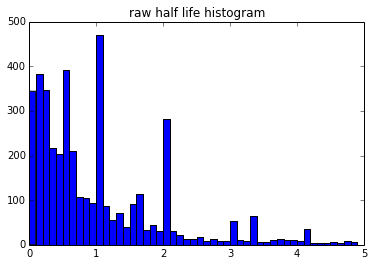

In [11]:
from matplotlib import pyplot as plt 
%matplotlib inline

import numpy as np 
bang = [i*0.1 for i in range(50)]
hls = np.array([float(i[5]) for i in now_list])
np.histogram(hls,bins = bang) 
hist,bins = np.histogram(hls,bins=bang)

plt.hist(hls, bins=bang) 
plt.title("raw half life histogram") 
plt.show()
